In [ ]:
#This document plots the data points over the 41-day period and makes a best fit sin function for them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
from scipy import optimize

In [3]:
data = Table.read("ASTR19_F25_group_project_data.txt", format="ascii")
data['col4'] = [8.11666666666667, 15.6166666666667, 8.91666666666667, 16.4166666666667, 9.75, 17.2333333333333, 10.5833333333333, 18, 11.4666666666667, 18.7666666666667, 12.3666666666667, 19.5166666666667, 13.4, 20.2666666666667, 3.36666666666667, 21.0166666666667, 4.11666666666667, 21.7666666666667, 4.83333333333333, 11.9666666666667, 5.51666666666667, 12.9333333333333, 6.13333333333333, 13.75, 6.78333333333333, 14.4166666666667, 7.36666666666667, 15, 7.98333333333333, 15.5666666666667, 8.56666666666667, 16.1333333333333, 9.16666666666667, 16.6833333333333, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.6333333333333, 18.8, 12.4166666666667, 19.3333333333333, 2.36666666666667, 19.8666666666667, 2.96666666666667, 20.5, 3.61666666666667, 10.7333333333333, 4.38333333333333, 11.9166666666667, 5.25, 12.95, 6.15, 13.8333333333333, 7.08333333333333, 14.65, 7.96666666666667, 15.45, 8.83333333333333, 16.1666666666667, 9.66666666666667, 16.8666666666667, 10.5, 17.5666666666667, 11.3166666666667, 18.2, 12.1666666666667, 18.8166666666667, 1.53333333333333, 19.4, 2.21666666666667, 20, 2.9, 9.9, 3.65, 11.25, 4.48333333333333, 12.3666666666667, 5.35, 13.2333333333333]

print(data)

#Column 3 is not necessarily the high/low tide

col1  col2  col3       col4      
---- ----- ----- ----------------
   1  8:07  6.57 8.11666666666667
   1 15:37 -0.39 15.6166666666667
   2  8:55  5.38 8.91666666666667
   2 16:25 -1.74 16.4166666666667
   3  9:45  5.26             9.75
   3 17:14 -1.36 17.2333333333333
   4 10:35  4.13 10.5833333333333
   4 18:00 -1.15             18.0
   5 11:28  3.48 11.4666666666667
   5 18:46 -1.61 18.7666666666667
 ...   ...   ...              ...
  37  2:13  4.13 2.21666666666667
  37 20:00  1.21             20.0
  38  2:54  3.34              2.9
  38  9:54  2.58              9.9
  39  3:39  3.32             3.65
  39 11:15  3.26            11.25
  40  4:29  5.21 4.48333333333333
  40 12:22  2.39 12.3666666666667
  41  5:21  4.83             5.35
  41 13:14  2.41 13.2333333333333
Length = 82 rows


1.035987078494534 0.01799866046413794 -3.5717397077847273 2.5396735375265145


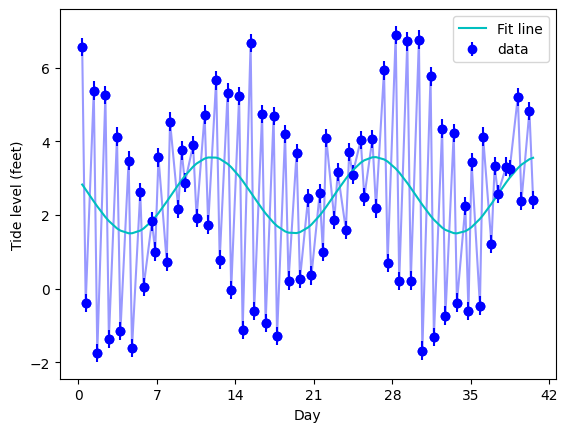

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = ((data['col1'] - 1)*24) + data['col4']
y = data['col3']

ax.plot(x, y, 'bo')
ax.errorbar(x, y, yerr=0.25, fmt='bo', label='data')
ax.plot(x, y, 'b-', alpha=0.4)



def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=0.25, p0=[1, 0.012, 0, 2])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

ax.plot(x, y_fit, 'c-', label='Fit line')

ax.set_xticks(np.linspace(0, 1008, 7), labels=('0', '7', '14', '21', '28', '35', '42'))
ax.set_xlabel('Day')
ax.set_ylabel('Tide level (feet)')

ax.legend()

Text(0, 0.5, 'Difference between data points and fit line')

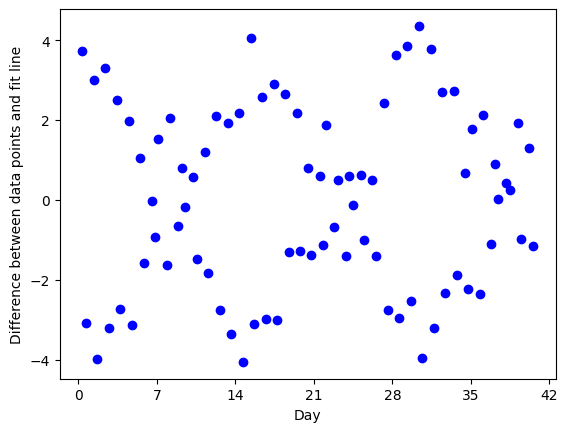

In [43]:
#Below here is starting on step 3, subtracting the best fit function off of the data

y2 = data['col3'] - y_fit   #tide level -best fit line

plt.plot(x, y2, 'bo')

plt.xticks(np.linspace(0, 1008, 7), labels=('0', '7', '14', '21', '28', '35', '42'))
plt.xlabel('Day')
plt.ylabel('Difference between data points and fit line')

In [ ]:
# ^ Difference between data points and fit line

In [44]:
print(np.std(y2))   #Standard deviation of values in above graph

2.270367047425257


1.3445463575215308 0.01773510183236621 296.4299011187236 2.036482721590458


Text(0, 0.5, 'Absval diff. between data points and fit line')

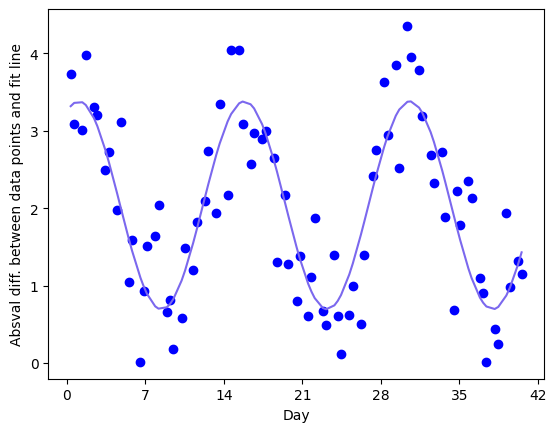

In [46]:
y3 = abs(y2)
plt.plot(x, y3, 'bo')
#Absolute value of difference between data and fit line (graph above here with an absval applied)
#We probably don't need this graph but it's kinda interesting
#I think it's more intuitive to understand this way

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d
#perform fit
params, params_cov = optimize.curve_fit(f_line, x, y3, sigma=0.25, p0=[2, 0.012, 300, 2])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
print(a_fit, b_fit, c_fit, d_fit)
y3_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

plt.plot(x, y3_fit, color='mediumslateblue', label='Fit line')

plt.xticks(np.linspace(0, 1008, 7), labels=('0', '7', '14', '21', '28', '35', '42'))

plt.xlabel('Day')
plt.ylabel('Absval diff. between data points and fit line')

In [ ]:
# ^ How much the tide varies from the first best fit line also oscillates, with a roughly 2-week period
#We can see this just by looking at the first graph's data points, there's periods where the tide goes really high
# and really low and periods where it doesn't change much from point to point
#That's what this is displaying